In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import requests


C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/Fifa2018.csv",sep=';')
rslt = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/results.csv",sep=',')

rslt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
df

,Group,Team
0,A,Russia
1,A,Uruguay
2,A,Egypt
3,A,Saudi Arabia
4,B,Spain
5,B,Portugal
6,B,Iran
7,B,Morocco
8,C,France
9,C,Denmark


In [4]:
rslt = rslt.loc[:,'date':'away_score']
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [5]:
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [6]:
def update(x,y):
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==y):
            rslt.at[j,'HomeGroup']=x
        if (rslt.away_team[j]==y):
            rslt.at[j,'AwayGroup']=x
            
    

for i in range(0,len(df.Group)):
    update(df.Group[i],df.Team[i])
    
    

In [7]:
i=0
j=0

k=0

def updatestats(TeamName):
    goalscored=0
    goalconceded=0
    noofmatch=0
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==TeamName):
            goalscored+=rslt.home_score[j]
            goalconceded+=rslt.away_score[j]
            noofmatch+=1 
        if (rslt.away_team[j]==TeamName):
            goalscored+=rslt.away_score[j]
            goalconceded+=rslt.home_score[j]
            noofmatch+=1
    
    
    for K in range(0,len(df.Team)):
        if (df.Team[K]==TeamName):
            df.at[K,'goal_scored']=goalscored
            df.at[K,'goal_conceded']=goalconceded
            df.at[K,'No_of_matches']=noofmatch


for i in range(0,len(df.Team)):
      updatestats(df.Team[i])
    

In [8]:
df

,Group,Team,goal_scored,goal_conceded,No_of_matches
0,A,Russia,1154.0,649.0,674.0
1,A,Uruguay,1361.0,1082.0,864.0
2,A,Egypt,992.0,629.0,616.0
3,A,Saudi Arabia,939.0,640.0,594.0
4,B,Spain,1336.0,610.0,674.0
5,B,Portugal,997.0,699.0,597.0
6,B,Iran,881.0,391.0,481.0
7,B,Morocco,708.0,430.0,508.0
8,C,France,1445.0,1083.0,817.0
9,C,Denmark,1380.0,1080.0,778.0


In [9]:
df['difference'] = df['goal_scored']-df['goal_conceded']


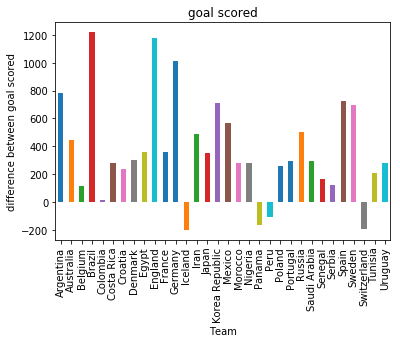

In [10]:
(df.groupby('Team')['difference']
      .mean()
      .plot(kind='bar', title='goal scored', yerr=df.groupby('Team')['difference'].std())
      .set_ylabel('difference between goal scored'));


In [26]:
i=0
K=0
j=0
global Team1
global Team2
Team1 = pd.DataFrame(columns=['Group'])
for K in range(0,len(df.Group)-1):
    i=K+1
    while ((df.Group[K])==(df.Group[i])):
        model = pm.Model();
        with model:
            GoalScoredTeam1 = pm.Poisson("GoalScoredTeam1",df.goal_scored[K]/df.No_of_matches[K])
            GoalConcededTeam1 = pm.Poisson("GoalConcededTeam1",df.goal_conceded[K]/df.No_of_matches[K])
            GoalScoredTeam2 = pm.Poisson("GoalScoredTeam2",df.goal_scored[i]/df.No_of_matches[i])
            GoalConcededTeam2 = pm.Poisson("GoalConcededTeam2",df.goal_conceded[i]/df.No_of_matches[i])
            Team1Win = pm.Poisson("Team1Win",GoalScoredTeam1+GoalConcededTeam2)
            Team2Win = pm.Poisson("Team2Win",GoalScoredTeam2+GoalConcededTeam1)
            trace= pm.sample(1000,tune=500,progressbar=True)
            Team1.at[j,'Group']=df.Group[K]
            Team1.at[j,'Home_Team']=df.Team[K]
            Team1.at[j,'Away_Team']=df.Team[i]                                  
            Team1.at[j,'HomeWon']=trace['Team1Win'].mean()
            Team1.at[j,'AwayWon']=trace['Team2Win'].mean()
            i+=1
            j+=1
            if(i==len(df.Group)):
                i=k+1
                
            



Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 609.70it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 675.61it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 632.58it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned

100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 637.96it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 611.44it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 664.53it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 658.70it/s]
Assigned

In [27]:
Team1

,Group,Home_Team,Away_Team,HomeWon,AwayWon
0,A,Russia,Uruguay,3.157,2.824
1,A,Russia,Egypt,3.067,1.931
2,A,Russia,Saudi Arabia,2.365,2.403
3,A,Uruguay,Egypt,2.662,2.924
4,A,Uruguay,Saudi Arabia,2.193,3.383
5,A,Egypt,Saudi Arabia,3.038,2.510
6,B,Spain,Portugal,2.893,2.635
7,B,Spain,Iran,3.470,2.477
8,B,Spain,Morocco,3.110,1.693
9,B,Portugal,Iran,2.639,3.338


In [28]:
i=0
for i in range(0,len(Team1)):
    if (Team1.HomeWon[i]>Team1.AwayWon[i]):
        Team1.at[i,'Home_Point']=3
        Team1.at[i,'Away_Point']=0
    if(Team1.HomeWon[i]<Team1.AwayWon[i]):
        Team1.at[i,'Away_Point']=3
        Team1.at[i,'Home_Point']=0
    if(Team1.HomeWon[i]==Team1.AwayWon[i]):
        Team1.at[i,'Away_Point']=1
        Team1.at[i,'Home_Point']=1
        
        
        
Team1            
    

,Group,Home_Team,Away_Team,HomeWon,AwayWon,Home_Point,Away_Point
0,A,Russia,Uruguay,3.157,2.824,3.0,0.0
1,A,Russia,Egypt,3.067,1.931,3.0,0.0
2,A,Russia,Saudi Arabia,2.365,2.403,0.0,3.0
3,A,Uruguay,Egypt,2.662,2.924,0.0,3.0
4,A,Uruguay,Saudi Arabia,2.193,3.383,0.0,3.0
5,A,Egypt,Saudi Arabia,3.038,2.510,3.0,0.0
6,B,Spain,Portugal,2.893,2.635,3.0,0.0
7,B,Spain,Iran,3.470,2.477,3.0,0.0
8,B,Spain,Morocco,3.110,1.693,3.0,0.0
9,B,Portugal,Iran,2.639,3.338,0.0,3.0


In [37]:
i=0
j=0
points=0
PreQtr = pd.DataFrame(columns=['Group'])

for i in range(0,len(df.Team)):
    for j in range(0,len(Team1)):
        
        if (Team1.Home_Team[j]==df.Team[i]):
            #points+=Team1.Home_Point[j]
            PreQtr.at[i,'points']+=Team1.Home_Point[j]
        if (Team1.Away_Team[j]==df.Team[i]):
            points+=Team1.Away_Point[j]
            PreQtr.at[i,'points']+=points    
        if not (Team1.Home_Team[j]==df.Team[i]):
            if not (Team1.Away_Team[j]==df.Team[i]):
                points=0
            
     
    
df        


ValueError: At based indexing on an non-integer index can only have non-integer indexers